In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek veri seti yükleme
df = pd.read_csv('cleaned_data.csv')

In [2]:
df.head()

,age,self_employed,family_history,treatment,remote_work,obs_consequence,gender_standardized,country_encoded,work_interfere_encoded,no_employees_encoded,...,seek_help_encoded,anonymity_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,coworkers_encoded,supervisor_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded
0,46,1,1,0,1,1,1,9,2,0,...,2,1,3,0,0,1,1,0,1,1
1,29,0,1,1,0,0,1,9,2,3,...,0,0,1,2,0,2,2,0,0,0
2,31,1,0,0,1,0,1,9,0,0,...,0,1,1,0,0,2,2,0,2,1
3,46,0,0,1,1,0,1,9,3,2,...,0,2,4,2,0,2,1,0,2,0
4,33,0,1,1,0,0,1,9,1,2,...,1,1,4,0,0,1,1,0,1,2


In [3]:
df.columns

Index(['age', 'self_employed', 'family_history', 'treatment', 'remote_work',
       'obs_consequence', 'gender_standardized', 'country_encoded',
       'work_interfere_encoded', 'no_employees_encoded', 'benefits_encoded',
       'care_options_encoded', 'wellness_program_encoded', 'seek_help_encoded',
       'anonymity_encoded', 'leave_encoded',
       'mental_health_consequence_encoded', 'phys_health_consequence_encoded',
       'coworkers_encoded', 'supervisor_encoded',
       'mental_health_interview_encoded', 'phys_health_interview_encoded',
       'mental_vs_physical_encoded'],
      dtype='object')

In [24]:
# Kadın ve erkek sayısını bulma
female_count = df[df['gender_standardized'] == 0].shape[0]
male_count = df[df['gender_standardized'] == 1].shape[0]

# Kadın sayısına eşit rastgele erkek seçme
if male_count > female_count:
    random_males = df[df['gender_standardized'] == 1].sample(female_count, random_state=1)
else:
    random_males = df[df['gender_standardized'] == 1]

# Yeni DataFrame oluşturma
balanced_df = pd.concat([df[df['gender_standardized'] == 0], random_males])

# Sonuçları gösterme
print(balanced_df['gender_standardized'].value_counts())

gender_standardized
0    155
1    155
Name: count, dtype: int64


# Cinsiyete Göre Ruh Sağlığı Tedavisi

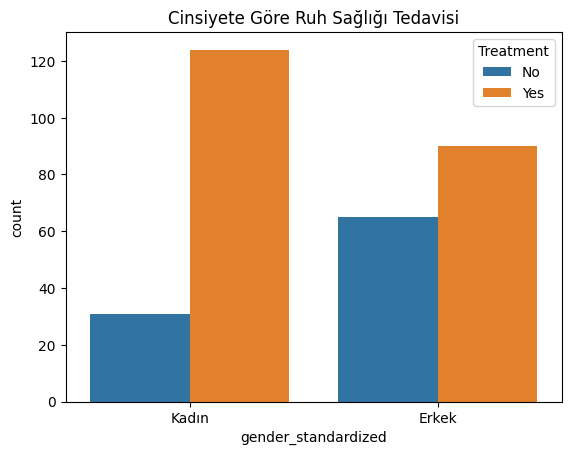

In [25]:
# Grafik oluşturma
sns.countplot(x='gender_standardized', hue='treatment', data=balanced_df)

# Eksen etiketlerini değiştirme
plt.xticks([0, 1], ['Kadın', 'Erkek'])  # Cinsiyet ekseni
plt.legend(title='Treatment', labels=['No', 'Yes'])  # Treatment efsanesi

# Grafik başlığı
plt.title('Cinsiyete Göre Ruh Sağlığı Tedavisi')
plt.show()

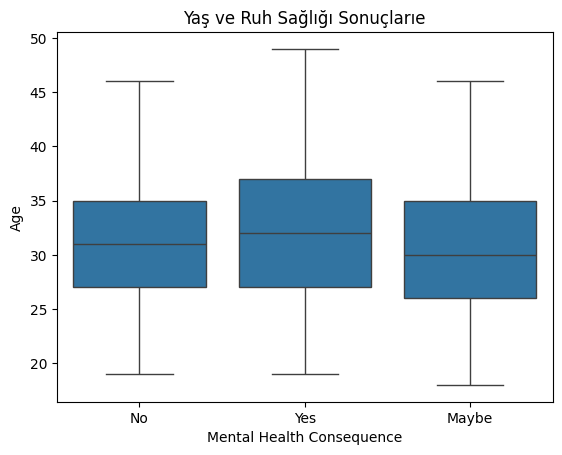

In [26]:
# Grafik oluşturma
sns.boxplot(x='mental_health_consequence_encoded', y='age', data=balanced_df)

# Eksen etiketlerini değiştirme
plt.xticks([0, 1, 2], ['No', 'Yes', 'Maybe'])  # Mental sağlık sonuçlarının etiketleri

# Grafik başlığı
plt.title('Yaş ve Ruh Sağlığı Sonuçlarıe')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Age')

# Grafiği gösterme
plt.show()

# Eğer bir ruh sağlığı durumunuz varsa, bunun işinize müdahale ettiğini düşünüyor musunuz?

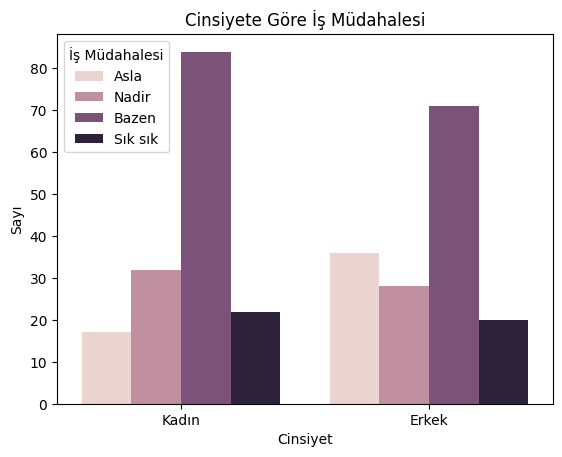

In [28]:

# İş müdahalesi etiketleri
work_interfere_labels = ['Asla', 'Nadir', 'Bazen', 'Sık sık']

# Grafiği çiziyoruz
sns.countplot(x='gender_standardized', hue='work_interfere_encoded', data=balanced_df)

# Başlık
plt.title('Cinsiyete Göre İş Müdahalesi')

# X ve Y eksenlerini etiketliyoruz
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')

# Legend (açıklama) etiketlerini güncelliyoruz
plt.xticks(ticks=[0, 1], labels=['Kadın', 'Erkek'])
plt.legend(title='İş Müdahalesi', labels=work_interfere_labels)

# Grafiği gösteriyoruz
plt.show()



# Cinsiyete Göre İzin Kolaylığı (Leave Difficulty)

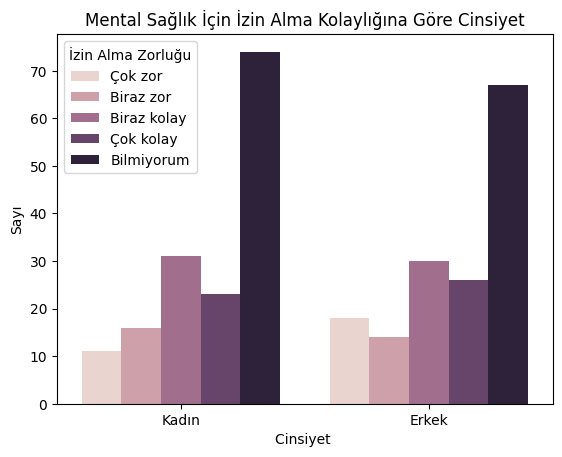

In [31]:
leave_labels = ['Çok zor', 'Biraz zor', 'Biraz kolay', 'Çok kolay', "Bilmiyorum"]

# Grafiği çiziyoruz
sns.countplot(x='gender_standardized', hue='leave_encoded', data=balanced_df)
plt.title('Mental Sağlık İçin İzin Alma Kolaylığına Göre Cinsiyet')

# X ve Y eksenlerini etiketliyoruz
plt.xlabel('Cinsiyet ')
plt.ylabel('Sayı')

# Legendi anlamlı hale getiriyoruz
plt.xticks(ticks=[0, 1], labels=['Kadın', 'Erkek'])
plt.legend(title='İzin Alma Zorluğu', labels=leave_labels)

# Grafiği gösteriyoruz
plt.show()

# Cinsiyete Göre Mental Sağlık Faydaları

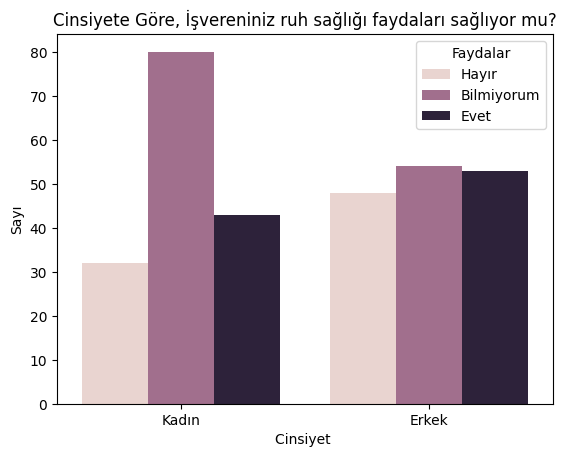

In [33]:
benefits_labels = ['Hayır', "Bilmiyorum", 'Evet']

# Grafiği çiziyoruz
sns.countplot(x='gender_standardized', hue='benefits_encoded', data=balanced_df)
plt.title('Cinsiyete Göre, İşvereniniz ruh sağlığı faydaları sağlıyor mu?')

# X ve Y eksenlerini etiketliyoruz
plt.xlabel('Cinsiyet ')
plt.ylabel('Sayı')

# Legendi anlamlı hale getiriyoruz
plt.xticks(ticks=[0, 1], labels=['Kadın', 'Erkek'])
plt.legend(title='Faydalar', labels=benefits_labels)

# Grafiği gösteriyoruz
plt.show()

#  Cinsiyete Göre Mental vs. Fiziksel Sağlık Kıyaslaması

İşvereninizin ruh sağlığını fiziksel sağlık kadar ciddiye aldığını düşünüyor musunuz?

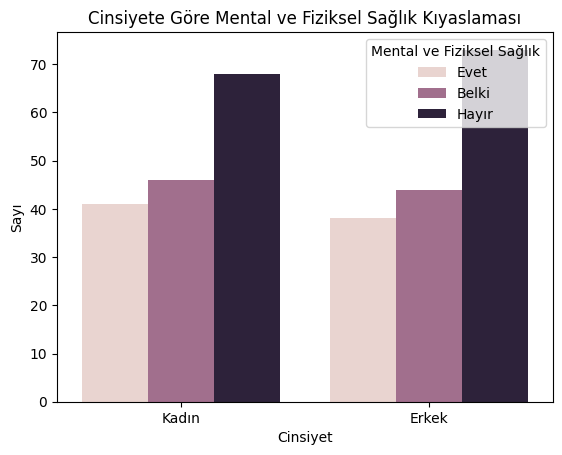

In [36]:
# Grafiği çiziyoruz
sns.countplot(x='gender_standardized', hue='mental_vs_physical_encoded', data=balanced_df)

# Başlık
plt.title('Cinsiyete Göre Mental ve Fiziksel Sağlık Kıyaslaması')

# X ve Y eksenlerini etiketliyoruz
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')

# X ekseninin etiketlerini güncelliyoruz
plt.xticks(ticks=[0, 1], labels=['Kadın', 'Erkek'])

# Legend (açıklama) etiketlerini güncelliyoruz
plt.legend(title='Mental ve Fiziksel Sağlık', labels=['Evet', 'Belki', 'Hayır'])

# Grafiği gösteriyoruz
plt.show()
